In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\movie_viewer_data.csv")

In [3]:
df.shape

(120, 7)

In [4]:
df.head()

,MovieID,Genre,Duration,ViewerAgeGroup,AvgWatchTime,Rating,Views
0,1,Thriller,112.7,Senior,90.4,NaN,22524
1,2,Sci-Fi,116.7,Adult,102.8,6.56,10894
2,3,Drama,140.4,Teen,90.5,3.54,31791
3,4,Comedy,104.2,Adult,78.1,5.30,19478
4,5,Sci-Fi,158.9,Adult,123.3,2.98,10004


In [5]:
df.tail()

,MovieID,Genre,Duration,ViewerAgeGroup,AvgWatchTime,Rating,Views
115,116,Comedy,102.1,Teen,95.5,6.46,34981
116,117,Comedy,102.3,Adult,63.0,5.47,67185
117,118,Sci-Fi,120.7,Senior,88.9,5.45,8780
118,119,Drama,149.3,Adult,116.6,4.96,14456
119,120,Action,106.8,Adult,102.4,7.25,92594


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MovieID         120 non-null    int64  
 1   Genre           120 non-null    object 
 2   Duration        120 non-null    float64
 3   ViewerAgeGroup  120 non-null    object 
 4   AvgWatchTime    120 non-null    float64
 5   Rating          116 non-null    float64
 6   Views           120 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 6.7+ KB


In [7]:
df.describe()

,MovieID,Duration,AvgWatchTime,Rating,Views
count,120.000000,120.000000,120.000000,116.000000,120.000000
mean,60.500000,118.702500,101.450833,6.118448,49599.808333
std,34.785054,18.225688,23.752198,1.533856,27922.610955
min,1.000000,80.000000,53.400000,2.370000,1671.000000
25%,30.750000,106.150000,84.700000,5.237500,25801.500000
50%,60.500000,119.700000,100.300000,6.210000,47902.000000
75%,90.250000,130.250000,116.800000,7.257500,71869.750000
max,120.000000,178.200000,173.300000,9.540000,99983.000000


In [8]:
df.isnull().sum()

MovieID           0
Genre             0
Duration          0
ViewerAgeGroup    0
AvgWatchTime      0
Rating            4
Views             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
#removing null values
df_clean=df.dropna().head()


In [11]:
df.isnull().sum()

MovieID           0
Genre             0
Duration          0
ViewerAgeGroup    0
AvgWatchTime      0
Rating            4
Views             0
dtype: int64

In [12]:
df.describe()

,MovieID,Duration,AvgWatchTime,Rating,Views
count,120.000000,120.000000,120.000000,116.000000,120.000000
mean,60.500000,118.702500,101.450833,6.118448,49599.808333
std,34.785054,18.225688,23.752198,1.533856,27922.610955
min,1.000000,80.000000,53.400000,2.370000,1671.000000
25%,30.750000,106.150000,84.700000,5.237500,25801.500000
50%,60.500000,119.700000,100.300000,6.210000,47902.000000
75%,90.250000,130.250000,116.800000,7.257500,71869.750000
max,120.000000,178.200000,173.300000,9.540000,99983.000000


In [13]:
#finding average ratings and standard deviation with numpy
import numpy as np

rating=df_clean["Rating"].to_numpy()
print("Avreage_Rating",np.mean(rating))
print("std_dev_Rating",np.std(rating))
print()
duration=df_clean["Duration"].to_numpy()
print("Avreage_Duration",np.mean(duration))
print("std_dev_Duration",np.std(duration))



Avreage_Rating 4.952
std_dev_Rating 1.4579766801975949

Avreage_Duration 127.92
std_dev_Duration 19.373321862809178


In [14]:
#correlation comparing between two variable
corr=np.corrcoef(rating,duration)[0,1]
print("correlation(rating vs duration):",corr)

correlation(rating vs duration): -0.8296949378576743


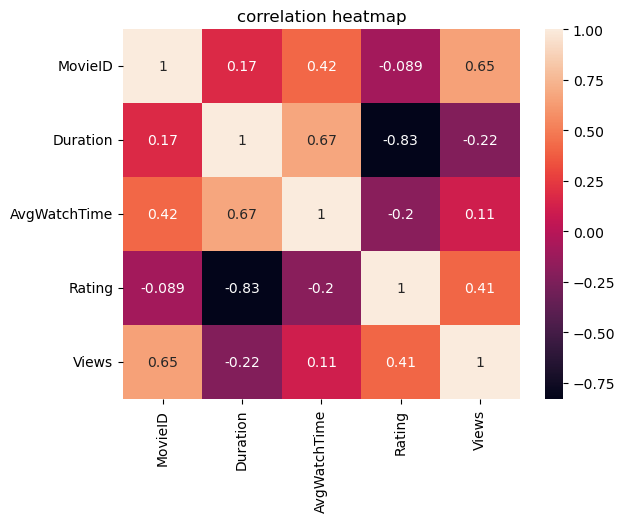

In [15]:
#heatmap using matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_clean.corr(numeric_only=True),annot=True)
plt.title("correlation heatmap")
plt.show()            

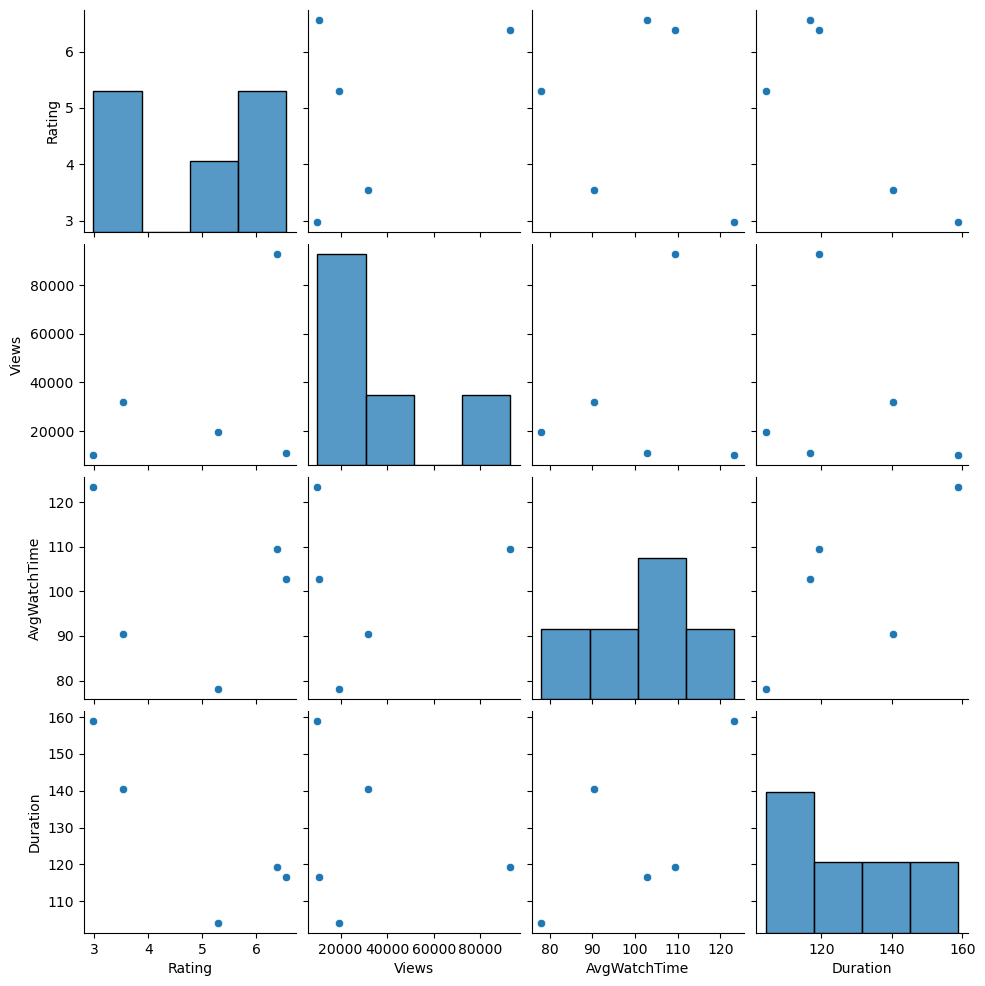

In [16]:
#pairplot
sns.pairplot(df_clean[["Rating","Views","AvgWatchTime","Duration"]])
plt.show()

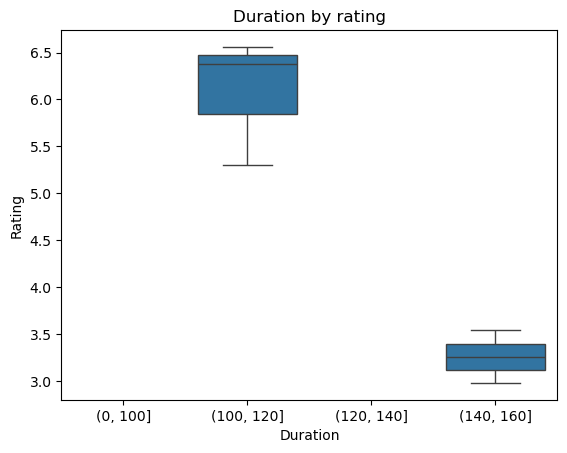

In [17]:
#boxplot
sns.boxplot(x=pd.cut(df_clean["Duration"],bins=[0,100,120,140,160]),y="Rating",data=df_clean)
plt.title("Duration by rating")
plt.show()             

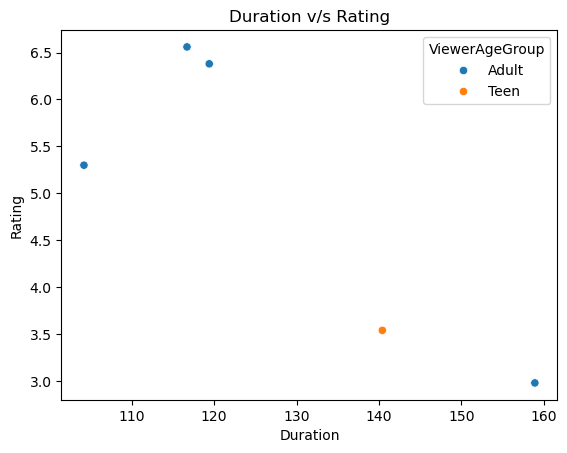

In [18]:
#Scatter plot
sns.scatterplot(x="Duration",y="Rating",hue="ViewerAgeGroup",data=df_clean)
plt.title("Duration v/s Rating")
plt.show()

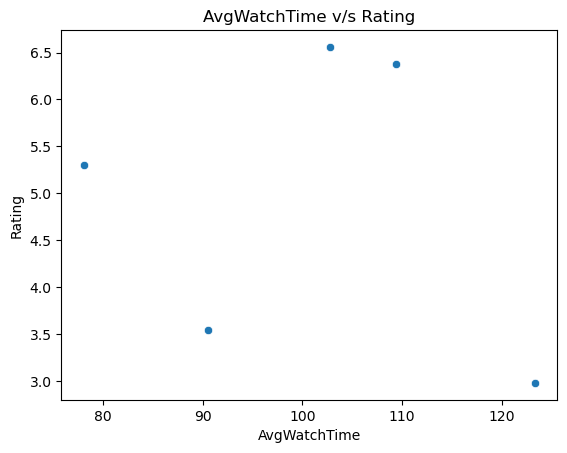

In [19]:
#scatter plot on Avg watch time vs Rating
sns.scatterplot(x="AvgWatchTime",y="Rating",data=df_clean)
plt.title("AvgWatchTime v/s Rating")
plt.show()